In [2]:
import regex as reg 
import unicodedata  
import os, re, json, html, base64
import numpy as np
import pandas as pd
from pathlib import Path
from ftfy import fix_text
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import HTML, display
from pathlib import Path
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [3]:
DATA_DIR = Path("/workspace/data")
IMG_DIR = Path("/workspace/data/images/image_train")
X_train = pd.read_csv(DATA_DIR/"X_train_update.csv", index_col=0)
Y_train = pd.read_csv(DATA_DIR/"Y_train_CVw08PX.csv", index_col=0)

In [4]:
# taux manquant de description
no_description = X_train["description"].isna().mean()
print(f"Description manquante: {no_description:.2%}")

Description manquante: 35.09%


In [5]:
# taux manquant de disignation
no_designation = X_train["designation"].isna().mean()
display(f"Designation manquante: {no_designation:.2%}")

'Designation manquante: 0.00%'

In [6]:
df = X_train.join(Y_train, how="inner")
#display(df.head())

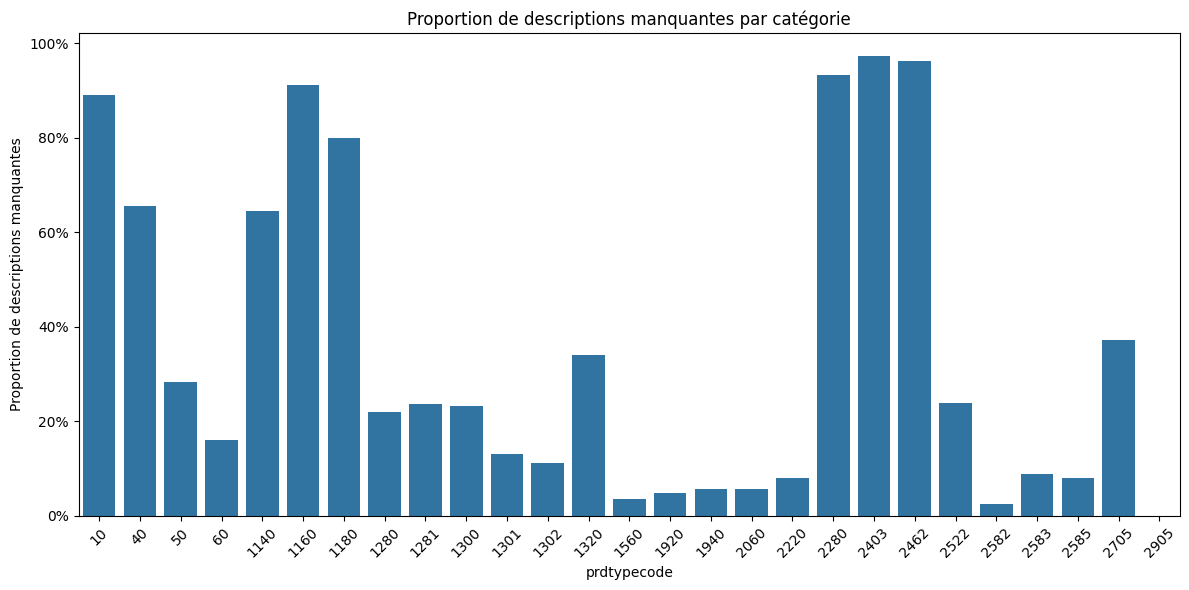

In [26]:
# 1. Compute missing proportion per category
missing_by_cat = (
    df.assign(description_isna=df["description"].isna())
      .groupby("prdtypecode")["description_isna"]
      .mean()
      .reset_index(name="missing_ratio")
)

# 2. Sort categories by missing ratio (optional but nicer)
missing_by_cat = missing_by_cat.sort_values("missing_ratio", ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=missing_by_cat,
    x="prdtypecode",
    y="missing_ratio"
)

# 3. Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.title("Proportion de descriptions manquantes par catégorie")
plt.xlabel("prdtypecode")
plt.ylabel("Proportion de descriptions manquantes")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
# Fonction pour nettoyer et standardiser les données textuelles:
def nettoyer_texte(text):
    if pd.isna(text): return ""
    s = str(text)
    s = reg.sub(r"<[^>]+>", " ", s)          # Supprime HTML
    s = html.unescape(s)                     # Décode entités HTML
    s = fix_text(s)                          # Corrige texte cassé
    s = unicodedata.normalize("NFC", s)      # Normalise Unicode
    s = reg.sub(r"(?<!\d)\.(?!\d)", " ", s)  # Supprime points non numériques
    s = reg.sub(r"(?<!\S)-(?!\S)", " ", s)  # Supprime tirets isolés
    s = reg.sub(r"(?<!\S):(?!\S)", " ", s)  # Supprime deux-points isolés
    s = reg.sub(r"(?<!\S)·(?!\S)", " ", s)  # Supprime points médians isolés
    s = reg.sub(r"(?<!\S)/(?!\S)", " ", s)
    s = reg.sub(r"(?<!\S)+(?!\S)", " ", s)
    s = s.replace("////", " ")    
    s = reg.sub(r"\s+", " ", s).strip()     # Nettoie espaces et casse
    return s

# Sélectionner la description d'un produit spécifique (index 14), lui appliquer la fonction 'nettoyer_texte',
# puis afficher et comparer le texte original et le texte nettoyé pour vérifier le résultat.
index_to_check = 14
original_text = df.loc[index_to_check, 'description']
cleaned_text = nettoyer_texte(original_text)

print(f"--- Index {index_to_check} [text original] ---")
print(original_text)
print("\n" + "="*40 + "\n")
print(f"--- Index {index_to_check} [text cleaned] ---")
print(cleaned_text)

NameError: name 'df' is not defined